In [1]:
# Import Libraries and dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras as keras

 # Libraries used in Data Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Libraries used for Feature Selection
from sklearn.cluster import KMeans

# Libraries for Model Parameters
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate

# Libraries for the Classification Reports
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical


In [2]:
# Data Preprocessing

# Load the dataset
data = pd.read_csv('ctg_csv.csv')

In [3]:
# Check for missing values
print(data.isnull().sum())
print(data.head())
print(data.tail())
print(data.describe)
# data = data.drop(['FileName', 'SegFile', 'Date', ], axis=1)
# print(data.describe)

b           0
e           0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
LB          0
AC.1        0
FM.1        0
UC.1        0
DL.1        0
DS.1        0
DP.1        0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64
     b     e  AC  FM  UC  DL  DS  DP   LB      AC.1  ...  Max  Nmax  Nzeros  \
0  240   357   0   0   0   0   0   0  120  0.000000  ...  126     2       0   
1    5   632   4   0   4   2   0   0  132  0.006380  ...  198     6       1   
2  177   779   2   0   5   2   0   0  133  0.003322  ...  198     5       1   
3  411  1192   2   0   6   2   0   0  134  0.002561  ...  170    11       0   
4  533  1147   4   0   5   0   0   0  132  0.006515  ...  170     9       0   

   Mode  Mean  Median  Variance  Tendency  CLASS  NSP  
0   120   137     121 

In [4]:
# Replace missing values with the mean of the respective columns

imputer = SimpleImputer(strategy='mean')
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])
data.fillna(data.mean(), inplace=True)
print(data.shape)

(4252, 31)


C:\Users\Ckkin\AppData\Local\Temp\ipykernel_35928\1883345179.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])


In [5]:
# Separate features and target variable

X = data.drop('NSP', axis=1)
y = data['NSP']

In [6]:
# Standardize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.71423878 -1.44609109 -0.76473985 ...  1.87056871  1.11298001
   1.48376361]
 [-0.97713923 -1.15061462  0.35885166 ... -0.23499819 -0.52452553
   0.49241181]
 [-0.78471847 -0.99266902 -0.20294409 ... -0.2004807  -0.52452553
   0.49241181]
 ...
 [ 0.78037828  0.95962458 -0.48384197 ... -0.51113811  1.11298001
   0.16196121]
 [ 0.78037828  1.4463549  -0.48384197 ... -0.51113811  1.11298001
   0.16196121]
 [ 2.1452232   1.83960721 -0.48384197 ... -0.61469058 -0.52452553
  -1.15984119]]


In [10]:
# Perform k-means clustering to determine the optimal number of clusters
inertia = []
for k in range(1, 15):
       kmeans = KMeans(n_clusters=k, random_state=42)
       kmeans.fit(X_scaled)
       inertia.append(kmeans.inertia_)

C:\Users\Ckkin\.conda\envs\cloud_Intrusion\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ckkin\.conda\envs\cloud_Intrusion\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ckkin\.conda\envs\cloud_Intrusion\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ckkin\.conda\envs\cloud_Intrusion\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

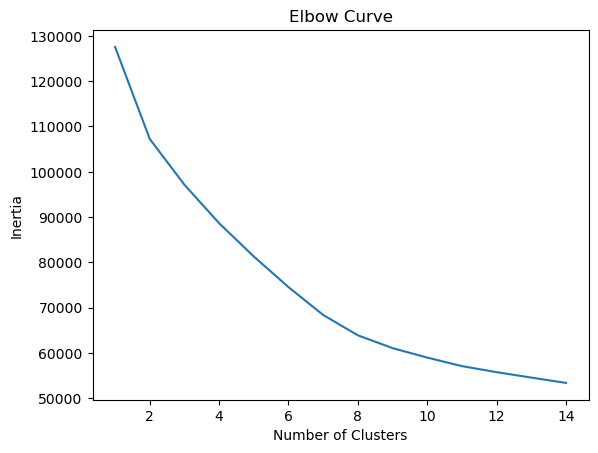

In [12]:
# Plot the elbow curve
plt.plot(range(1, 15), inertia)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\Ckkin\.conda\envs\cloud_Intrusion\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


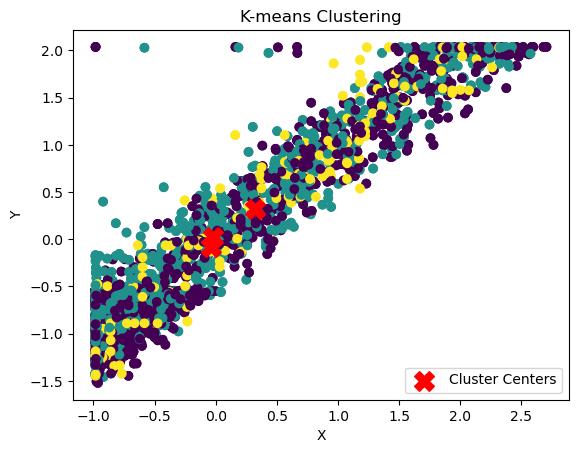

In [13]:
# Plotting Clusters

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='red', s=200, label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [14]:
data['cluster'] = kmeans.labels_
# Save the preprocessed data
data.to_csv('preprocessed_cardiotocography.csv', index=False)
print(data.shape)
print(data.columns)

(4252, 32)
Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'LB', 'AC.1', 'FM.1',
       'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width',
       'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'CLASS', 'NSP', 'cluster'],
      dtype='object')


In [15]:
# Load the preprocessed dataset
data = pd.read_csv('preprocessed_cardiotocography.csv')
print(data.columns)

Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'LB', 'AC.1', 'FM.1',
       'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width',
       'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'CLASS', 'NSP', 'cluster'],
      dtype='object')


In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('cluster', axis=1), data['cluster'], test_size=0.2)
# Reshape the training and testing data to be 3D arrays
X_train = np.expand_dims(X_train.values, axis=2)
X_test = np.expand_dims(X_test.values, axis=2)

# Convert target values to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

# Define the input shape of the network
input_shape = (X_train.shape[1], 1)
print(input_shape)
# Define the architecture of the network
left_input = Input(input_shape)
right_input = Input(input_shape)

(31, 1)


In [17]:
W_init = keras.initializers.RandomNormal(mean = 0.0, stddev = 1e-2)
b_init = keras.initializers.RandomNormal(mean = 0.5, stddev = 1e-2)

In [18]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv1D(32, (10), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling1D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(64, (10), activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])

In [19]:
encoded_l = model(left_input)
encoded_r = model(right_input)
subtracted = keras.layers.Subtract()([encoded_l, encoded_r])
prediction = Dense(1, activation='softmax', bias_initializer=b_init)(subtracted)
siamese_net = Model(inputs=[left_input, right_input], outputs=prediction)

optimiser = keras.optimizers.Adam(learning_rate=0.00001)
siamese_net.compile(loss='categorical_crossentropy', optimizer=optimiser,metrics=['accuracy'])
#history=siamese_net.fit([X_train, X_train], y_train, validation_data=([X_test, X_test], y_test), epochs=10, batch_size=32)

In [20]:
from tensorflow.keras.utils import plot_model

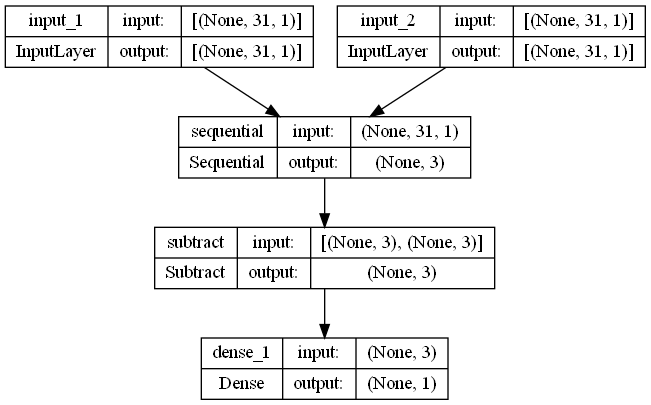

In [21]:
plot_model(siamese_net, show_shapes=True, show_layer_names=True)

In [22]:
conv1 = Conv1D(32, 3, activation='relu')
max_pool1 = MaxPooling1D(pool_size=2)
conv2 = Conv1D(32, 3, activation='relu')
max_pool2 = MaxPooling1D(pool_size=2)
flatten = Flatten()
dense1 = Dense(32, activation='relu')
dense2 = Dense(1, activation='sigmoid')

In [23]:
# # Apply the architecture to the left and right inputs
left_branch = dense2(dense1(flatten(max_pool2(conv2(max_pool1(conv1(left_input)))))))
right_branch = dense2(dense1(flatten(max_pool2(conv2(max_pool1(conv1(right_input)))))))
merged = concatenate([left_branch, right_branch], axis=1)
model = Model(inputs=[left_input, right_input], outputs=merged)

In [24]:
# # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.25)
model.compile(loss='binary_crossentropy', optimizer=optimiser, metrics=['accuracy'])
print("Train on = ",X_train.shape , "samples Test on ", X_test.shape," samples")
model.summary()

Train on =  (3401, 31, 1) samples Test on  (851, 31, 1)  samples
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 31, 1)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 31, 1)]      0           []                               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 29, 32)       128         ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 max_pooling1d_2 (MaxPoolin

In [25]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM as Pyram, Dense
from sklearn.metrics import classification_report
# Convert target values to one-hot encoded format

In [26]:
# Convert target values to one-hot encoded format

y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

In [27]:
model = Sequential()
model.add(Pyram(units=64, input_shape=input_shape))
model.add(Dense(units=3, activation='softmax'))

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:

# Train the model
model.fit(X_train, y_train_encoded, epochs=20, batch_size=8)

Epoch 1/20
426/426 [==============================] - 6s 8ms/step - loss: 0.4561 - accuracy: 0.8165
Epoch 2/20
426/426 [==============================] - 3s 8ms/step - loss: 0.2619 - accuracy: 0.8994
Epoch 3/20
426/426 [==============================] - 3s 8ms/step - loss: 0.2161 - accuracy: 0.9115
Epoch 4/20
426/426 [==============================] - 4s 8ms/step - loss: 0.1914 - accuracy: 0.9197
Epoch 5/20
426/426 [==============================] - 3s 8ms/step - loss: 0.1769 - accuracy: 0.9300
Epoch 6/20
426/426 [==============================] - 3s 8ms/step - loss: 0.1605 - accuracy: 0.9327
Epoch 7/20
426/426 [==============================] - 4s 8ms/step - loss: 0.1385 - accuracy: 0.9394
Epoch 8/20
426/426 [==============================] - 4s 8ms/step - loss: 0.1394 - accuracy: 0.9377
Epoch 9/20
426/426 [==============================] - 4s 9ms/step - loss: 0.1076 - accuracy: 0.9547
Epoch 10/20
426/426 [==============================] - 4s 8ms/step - loss: 0.1030 - accuracy: 0.9571

In [30]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Convert true labels to class labels
y_true_classes = y_test_encoded.argmax(axis=1)

# Display classification report as DataFrame
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()
display(df_report)

27/27 [==============================] - 1s 4ms/step


,precision,recall,f1-score,support
0,0.995283,0.956916,0.975723,441.000000
1,0.943820,0.985337,0.964132,341.000000
2,0.943662,0.971014,0.957143,69.000000
accuracy,0.969448,0.969448,0.969448,0.969448
macro avg,0.960922,0.971089,0.965666,851.000000
weighted avg,0.970476,0.969448,0.969572,851.000000


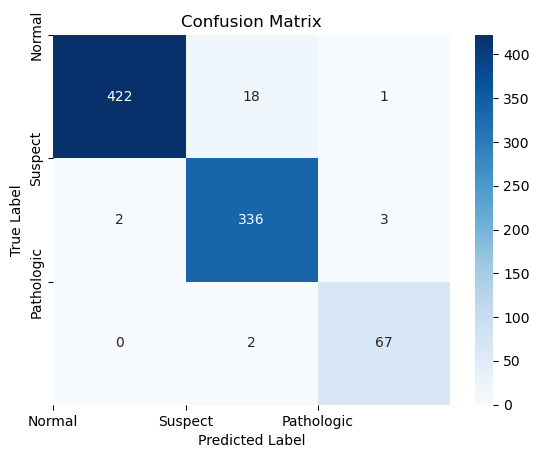

In [31]:
# confusion matrix

# Define your label names
labels = ['Normal', 'Suspect', 'Pathologic']

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix in a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the labels for x-axis and y-axis
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()